# Getting Starting

## Importing and Sampling

In [1]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [2]:
data=pd.read_parquet('./fhvhv_tripdata_2022-11.parquet')
data = data.sample(n=200000, random_state=1)

In [3]:
data.head(10)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
12201792,HV0003,B03404,B03404,2022-11-20 10:58:36,2022-11-20 11:02:12,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.280,...,2.24,2.75,0.0,3.09,16.33,N,N,,N,N
5140632,HV0003,B03404,B03404,2022-11-09 18:14:12,2022-11-09 18:19:25,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.390,...,0.94,0.00,0.0,0.00,6.83,N,N,,N,N
13040156,HV0003,B03404,B03404,2022-11-21 19:10:06,2022-11-21 19:13:37,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.790,...,3.78,2.75,0.0,0.00,29.50,N,N,,N,N
2107754,HV0003,B03404,B03404,2022-11-04 17:46:25,2022-11-04 17:46:43,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.210,...,1.27,0.00,0.0,5.00,11.18,N,N,,N,N
17227919,HV0003,B03404,B03404,2022-11-29 15:23:51,2022-11-29 15:28:55,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.630,...,0.67,0.00,0.0,0.00,5.94,N,N,,N,N
10924600,HV0003,B03404,B03404,2022-11-18 19:55:59,2022-11-18 19:59:36,2022-11-18 19:59:57,2022-11-18 20:06:06,41,238,1.140,...,0.70,0.00,0.0,1.00,6.84,N,N,,N,N
14977583,HV0005,B03406,None,2022-11-25 10:13:47,NaT,2022-11-25 10:18:30,2022-11-25 10:35:28,198,138,7.584,...,2.46,0.00,2.5,0.00,17.86,N,N,N,N,N
7891490,HV0005,B03406,None,2022-11-13 20:00:59,NaT,2022-11-13 20:03:31,2022-11-13 20:30:47,37,79,4.435,...,2.03,2.75,0.0,0.00,19.67,N,N,N,N,N
15668172,HV0003,B03404,B03404,2022-11-26 17:41:07,2022-11-26 17:42:42,2022-11-26 17:43:24,2022-11-26 17:53:56,143,246,1.730,...,1.03,2.75,0.0,0.00,7.93,N,N,,N,N
12055493,HV0003,B03404,B03404,2022-11-20 04:51:32,2022-11-20 04:55:31,2022-11-20 04:55:59,2022-11-20 05:00:53,114,249,0.630,...,0.65,2.75,0.0,0.00,17.56,N,N,,N,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 12201792 to 7419397
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   hvfhs_license_num     200000 non-null  object        
 1   dispatching_base_num  200000 non-null  object        
 2   originating_base_num  143368 non-null  object        
 3   request_datetime      200000 non-null  datetime64[us]
 4   on_scene_datetime     143368 non-null  datetime64[us]
 5   pickup_datetime       200000 non-null  datetime64[us]
 6   dropoff_datetime      200000 non-null  datetime64[us]
 7   PULocationID          200000 non-null  int64         
 8   DOLocationID          200000 non-null  int64         
 9   trip_miles            200000 non-null  float64       
 10  trip_time             200000 non-null  int64         
 11  base_passenger_fare   200000 non-null  float64       
 12  tolls                 200000 non-null  float64       
 

## Preliminary Feature Selection 

### Dropping irrelevant features

Accroding to our experiment, features such as *hvfhs_license_num, dispatching_base_num, originating_base_num, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag* are not relevant to the objective of this project.

In [5]:
## dropping columns 
data.drop(columns=['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num', 'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag'], inplace=True)
data.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
12201792,2022-11-20 10:58:36,2022-11-20 11:02:12,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.28,1024,25.21,0.0,0.76,2.24,2.75,0.0,3.09,16.33
5140632,2022-11-09 18:14:12,2022-11-09 18:19:25,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.39,415,10.64,0.0,0.32,0.94,0.00,0.0,0.00,6.83
13040156,2022-11-21 19:10:06,2022-11-21 19:13:37,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.79,1215,42.57,0.0,1.28,3.78,2.75,0.0,0.00,29.50
2107754,2022-11-04 17:46:25,2022-11-04 17:46:43,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.21,939,14.28,0.0,0.43,1.27,0.00,0.0,5.00,11.18
17227919,2022-11-29 15:23:51,2022-11-29 15:28:55,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.63,268,7.51,0.0,0.23,0.67,0.00,0.0,0.00,5.94


In [6]:
data.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,200000,143368,200000,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2022-11-15 20:12:47.863730,2022-11-15 18:59:16.411172,2022-11-15 20:17:52.897166,2022-11-15 20:37:39.640315,139.652900,143.311010,5.042292,1188.448960,23.791116,1.134798,0.753085,2.010749,1.141124,0.214225,1.138825,18.516545
min,2022-10-31 23:42:05,2022-10-31 23:58:42,2022-11-01 00:00:27,2022-11-01 00:05:09,3.000000,1.000000,0.000000,1.000000,-56.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
25%,2022-11-08 15:41:26.250000,2022-11-08 15:30:46.500000,2022-11-08 15:45:25.750000,2022-11-08 16:09:29,76.000000,76.000000,1.590000,606.000000,11.480000,0.000000,0.340000,0.950000,0.000000,0.000000,0.000000,8.590000
50%,2022-11-15 19:51:51,2022-11-15 18:49:27.500000,2022-11-15 19:57:17.500000,2022-11-15 20:15:07,141.000000,142.000000,3.000000,972.000000,18.040000,0.000000,0.540000,1.530000,0.000000,0.000000,0.000000,14.170000
75%,2022-11-22 19:34:06.750000,2022-11-22 17:52:24.750000,2022-11-22 19:38:45.750000,2022-11-22 20:01:59.500000,211.000000,220.000000,6.240000,1520.000000,29.210000,0.000000,0.910000,2.530000,2.750000,0.000000,0.000000,23.200000
max,2022-11-30 23:57:37,2022-11-30 23:59:10,2022-11-30 23:59:38,2022-12-01 00:45:38,265.000000,265.000000,308.270000,21320.000000,773.400000,74.960000,24.220000,71.660000,5.500000,5.000000,180.660000,571.870000
std,NaN,NaN,NaN,NaN,74.633031,77.692854,5.907836,847.034448,19.879170,3.905429,0.669195,1.647461,1.351774,0.700714,3.182898,15.513289


## Exploring, Cleaning and Transforming Indivual Features

### Airport Fee

In [7]:
counts = data['airport_fee'].value_counts()
counts

airport_fee
0.00    182752
2.50     16833
1.25       350
5.00        65
Name: count, dtype: int64

In [8]:
data['is_airport_trip'] = np.where(data['airport_fee'] > 0, 1, 0)

### Congestion Surcharge

In [9]:
counts = data['congestion_surcharge'].value_counts()
counts

congestion_surcharge
0.00    115859
2.75     82436
0.75      1649
5.50        49
3.00         4
1.50         1
3.75         1
2.25         1
Name: count, dtype: int64

In [10]:
def calcular_congestion_surcharge(congestion_surcharge):
    if congestion_surcharge == 0:
        return 0        # no congestion
    elif congestion_surcharge > 0 and congestion_surcharge < 2:
        return 1        # low
    elif congestion_surcharge >= 2 and congestion_surcharge < 3:
        return 2        # medium
    else:
        return 3        # high
# ref https://www.kaggle.com/code/alexbonella/ny-trip-datexland-price-model

In [11]:
data['congestion_lvl'] = data['congestion_surcharge'].apply(calcular_congestion_surcharge)

### Base Passenger Fare

In [12]:
print(f"base_passenger_fare Min: {data['base_passenger_fare'].min()}, Max: {data['base_passenger_fare'].max()}")


base_passenger_fare Min: -56.57, Max: 773.4


In [13]:
data[data['base_passenger_fare'] > 400]

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,is_airport_trip,congestion_lvl
9111533,2022-11-15 22:22:44,2022-11-15 22:27:20,2022-11-15 22:28:23,2022-11-16 01:49:49,132,265,192.31,12086,773.40,31.53,24.22,71.66,0.00,2.5,180.66,528.28,1,0
10164133,2022-11-17 17:15:00,2022-11-17 16:35:52,2022-11-17 17:21:03,2022-11-17 22:15:28,39,39,30.41,17665,444.35,0.00,13.33,39.44,0.00,0.0,49.71,319.93,0,0
16025804,2022-11-27 08:48:48,2022-11-27 08:49:10,2022-11-27 08:50:01,2022-11-27 13:11:25,48,265,308.27,15684,761.59,24.98,23.60,69.81,2.75,0.0,70.00,571.87,0,2
16168479,2022-11-27 14:51:07,2022-11-27 14:53:36,2022-11-27 14:55:36,2022-11-27 20:50:56,92,265,211.30,21320,563.67,13.25,17.31,0.00,0.00,0.0,0.00,490.03,0,0
7967802,2022-11-13 22:43:24,2022-11-13 22:51:39,2022-11-13 22:52:02,2022-11-14 02:15:12,138,265,211.53,12190,638.12,14.15,19.57,0.00,0.00,0.0,135.24,491.68,0,0
13338831,2022-11-22 12:05:00,2022-11-22 11:31:09,2022-11-22 11:59:13,2022-11-22 13:52:32,237,265,94.74,6799,550.55,41.08,17.75,0.00,0.00,0.0,0.00,396.40,0,0
1249469,2022-11-03 09:40:00,2022-11-03 09:38:04,2022-11-03 09:39:43,2022-11-03 14:20:56,92,265,217.69,16873,722.07,53.87,23.28,0.00,0.00,0.0,0.00,535.18,0,0


In [14]:
data[data['base_passenger_fare'] < 5].head(10)

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,is_airport_trip,congestion_lvl
8846724,2022-11-15 14:37:34,2022-11-15 14:43:33,2022-11-15 15:05:00,2022-11-15 15:23:29,89,89,0.03,1109,-2.32,0.0,0.59,1.73,0.00,0.0,0.0,14.64,0,0
14458049,2022-11-24 12:46:16,2022-11-24 12:49:04,2022-11-24 12:49:05,2022-11-24 12:52:01,249,249,0.02,176,-6.64,0.0,0.98,2.91,2.75,0.0,0.0,0.00,0,2
11769569,2022-11-19 20:13:36,2022-11-19 20:17:05,2022-11-19 20:18:10,2022-11-19 20:21:15,39,39,0.62,185,4.60,0.0,0.17,0.51,0.00,0.0,0.0,6.64,0,0
1951073,2022-11-04 11:58:55,2022-11-04 11:59:27,2022-11-04 12:01:40,2022-11-04 12:06:00,249,249,0.05,260,-3.71,0.0,0.24,0.72,2.75,0.0,0.0,0.21,0,2
6925747,2022-11-12 13:15:08,2022-11-12 13:17:05,2022-11-12 13:18:02,2022-11-12 13:40:17,256,144,2.77,1335,-2.75,0.0,0.00,0.00,2.75,0.0,0.0,16.22,0,2
12682554,2022-11-21 07:42:53,2022-11-21 07:48:58,2022-11-21 07:49:16,2022-11-21 07:58:53,238,239,1.04,577,3.72,0.0,0.27,0.81,2.75,0.0,0.0,6.31,0,2
1058621,2022-11-02 21:51:43,2022-11-02 22:03:05,2022-11-02 22:03:05,2022-11-02 22:08:32,234,113,0.61,327,-4.49,0.0,0.44,1.30,2.75,0.0,0.0,0.80,0,2
3750887,2022-11-07 06:26:27,2022-11-07 06:29:04,2022-11-07 06:31:01,2022-11-07 06:36:12,239,142,1.00,311,4.54,0.0,0.22,0.65,2.75,0.0,0.0,7.13,0,2
5683053,2022-11-10 17:41:22,2022-11-10 17:45:24,2022-11-10 17:46:42,2022-11-10 17:53:50,42,42,1.08,428,1.38,0.0,0.27,0.79,0.00,0.0,0.0,8.68,0,0
17253382,2022-11-29 16:53:17,2022-11-29 16:53:27,2022-11-29 16:54:29,2022-11-29 17:11:38,24,142,2.45,1029,-4.56,0.0,0.46,1.35,2.75,0.0,0.0,11.93,0,2


In [15]:
# Deleting rows with negative fare and fare less than 5
data = data[(data['base_passenger_fare'] > 5)]

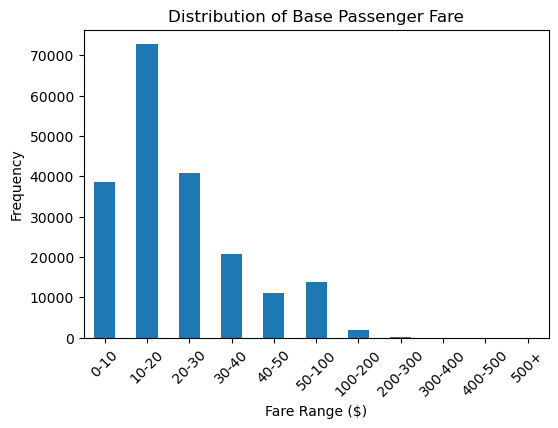

In [16]:
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500+']

# Step 2: Create a new column in your DataFrame for the binned fare values
data['fare_range'] = pd.cut(data['base_passenger_fare'], bins=bins, labels=labels)

# Step 3: Calculate the value counts for each bin to see the distribution
fare_distribution = data['fare_range'].value_counts().sort_index()

# Step 4: Plot the distribution as a bar chart
plt.figure(figsize=(6, 4))
fare_distribution.plot(kind='bar')
plt.title('Distribution of Base Passenger Fare')
plt.xlabel('Fare Range ($)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

data.drop(columns=['fare_range'], inplace=True)

In [17]:
data.shape

(199710, 18)

### BCF

In [18]:
print(f"bcf Min: {data['bcf'].min()}, Max: {data['bcf'].max()}")

bcf Min: 0.0, Max: 24.22


In [19]:
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18']

# Step 2: Create a new column in your DataFrame for the binned fare values
data['bcf_range'] = pd.cut(data['bcf'], bins=bins, labels=labels)

data['bcf_range'].value_counts()

data.drop(columns=['bcf_range'], inplace=True)

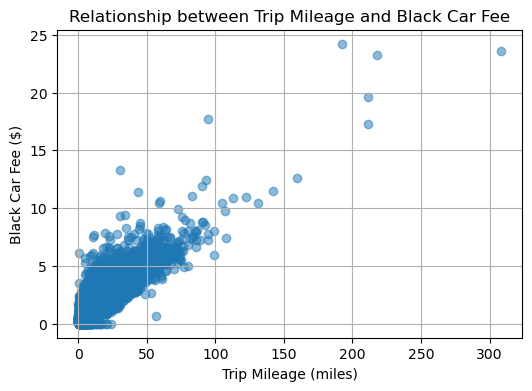

In [20]:
plt.figure(figsize=(6, 4))
plt.scatter(data['trip_miles'], data['bcf'], alpha=0.5)  # alpha is set for better visualization of point density
plt.title('Relationship between Trip Mileage and Black Car Fee')
plt.xlabel('Trip Mileage (miles)')
plt.ylabel('Black Car Fee ($)')
plt.grid(True)
plt.show()

In [21]:
data['bcf_charge'] = np.where(data['bcf'] > 0, 1, 0)

In [22]:
data.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,is_airport_trip,congestion_lvl,bcf_charge
12201792,2022-11-20 10:58:36,2022-11-20 11:02:12,2022-11-20 11:02:45,2022-11-20 11:19:49,41,48,5.28,1024,25.21,0.0,0.76,2.24,2.75,0.0,3.09,16.33,0,2,1
5140632,2022-11-09 18:14:12,2022-11-09 18:19:25,2022-11-09 18:19:42,2022-11-09 18:26:37,157,82,1.39,415,10.64,0.0,0.32,0.94,0.00,0.0,0.00,6.83,0,0,1
13040156,2022-11-21 19:10:06,2022-11-21 19:13:37,2022-11-21 19:13:41,2022-11-21 19:33:56,163,125,4.79,1215,42.57,0.0,1.28,3.78,2.75,0.0,0.00,29.50,0,2,1
2107754,2022-11-04 17:46:25,2022-11-04 17:46:43,2022-11-04 17:47:21,2022-11-04 18:03:00,10,130,2.21,939,14.28,0.0,0.43,1.27,0.00,0.0,5.00,11.18,0,0,1
17227919,2022-11-29 15:23:51,2022-11-29 15:28:55,2022-11-29 15:29:02,2022-11-29 15:33:30,210,210,0.63,268,7.51,0.0,0.23,0.67,0.00,0.0,0.00,5.94,0,0,1


### Trip Time and Trip Miles

In [23]:
data[['trip_miles', 'trip_time']].describe()

,trip_miles,trip_time
count,199710.000000,199710.000000
mean,5.043637,1188.651910
std,5.907455,846.577228
min,0.000000,1.000000
25%,1.590000,607.000000
50%,3.000000,972.000000
75%,6.240000,1521.000000
max,308.270000,21320.000000


In [24]:
# Calculating real trip time using dropoff and pickup datetime
data['trip_time_real'] = round((data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() / 60.0,3) 

In [25]:
# Only consider trip time greater than 5 mins and less than 2 hours
data = data[(data['trip_time_real'] > 5) & (data['trip_time_real'] < 120)]  

In [26]:
# Calculating the average speed miles/min
temp = data.loc[(data['trip_miles'] > 0) & (data['trip_time_real'] > 0), ['trip_miles', 'trip_time_real']]
temp['speed'] = temp['trip_miles'] / temp['trip_time_real']
avg_speed = temp['speed'].mean()
del temp
avg_speed

0.23063345135297278

In [27]:
# Fixing rows with trip miles equal to 0 with average speed
data.loc[data['trip_miles'] == 0, 'trip_miles'] = avg_speed * data['trip_time_real']

In [28]:
# Filter out rows with mileage less than 1
data = data[(data['trip_miles'] > 1)] 

In [29]:
data[['trip_miles', 'trip_time', 'trip_time_real']].describe()

,trip_miles,trip_time,trip_time_real
count,178859.000000,178859.000000,178859.000000
mean,5.503852,1277.803163,21.294153
std,5.791900,819.121313,13.643516
min,1.001000,301.000000,5.017000
25%,1.932000,703.000000,11.717000
50%,3.435000,1059.000000,17.650000
75%,6.840000,1604.000000,26.733000
max,99.008000,8591.000000,119.883000


### Total Fare

In [30]:
### Total Fare
data["total_fare"] = data["base_passenger_fare"] + data["congestion_surcharge"] + data["airport_fee"]

#### Other Considerations:

Driver Pay contains some negative value, however, we are not using this feature to predict the fare, but it was used as a reference earlier when exploring the passenger base fare.

## More Feature Engineering

### Date & Time

In [31]:
data.drop(columns=['request_datetime', 'on_scene_datetime', 'tips', 'driver_pay', 'tolls', 'dropoff_datetime', 'airport_fee', 'congestion_surcharge', 'trip_time', 'sales_tax', 'bcf_charge', 'bcf' ], inplace=True)

In [32]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['pickup_day_no']=data['pickup_datetime'].dt.weekday # monday 0 - sunday 6
data['pickup_hour']=data['pickup_datetime'].dt.hour

In [33]:
data.describe()

,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,is_airport_trip,congestion_lvl,trip_time_real,total_fare,pickup_day_no,pickup_hour
count,178859,178859.000000,178859.000000,178859.000000,178859.000000,178859.000000,178859.000000,178859.000000,178859.000000,178859.000000,178859.000000
mean,2022-11-15 19:32:05.013004,139.768784,143.728870,5.503852,25.382523,0.095483,0.849831,21.294153,26.783312,3.054356,13.486635
min,2022-11-01 00:00:27,3.000000,1.000000,1.001000,5.010000,0.000000,0.000000,5.017000,5.010000,0.000000,0.000000
25%,2022-11-08 14:38:32,76.000000,76.000000,1.932000,13.010000,0.000000,0.000000,11.717000,13.990000,1.000000,9.000000
50%,2022-11-15 19:13:02,141.000000,142.000000,3.435000,19.700000,0.000000,0.000000,17.650000,21.000000,3.000000,14.000000
75%,2022-11-22 19:24:28,211.000000,220.000000,6.840000,30.990000,0.000000,2.000000,26.733000,32.810000,5.000000,19.000000
max,2022-11-30 23:59:38,265.000000,265.000000,99.008000,550.550000,1.000000,3.000000,119.883000,550.550000,6.000000,23.000000
std,NaN,74.402830,77.815825,5.791900,19.546111,0.293882,0.984680,13.643516,20.099027,1.956060,6.457008


In [34]:
# Creating new feature day_x_time, categorical feature of combination of day of the week and hour of the day
data['day_x_time'] = data['pickup_day_no'].astype(str) + data['pickup_hour'].astype(str).str.zfill(2)

### Encoding day_x_time and PU/DOLocationID

In [35]:
import category_encoders as ce
features = ['day_x_time', 'PULocationID', 'DOLocationID']
encoder = ce.TargetEncoder(cols=features)
data_encoded = encoder.fit_transform(data[features], data['total_fare'])
data_encoded = data_encoded.rename(columns={
    'day_x_time': 'enc_day_x_time',
    'PULocationID': 'enc_PULocationID',
    'DOLocationID': 'enc_DOLocationID'
})
data_encoded.head()

,enc_day_x_time,enc_PULocationID,enc_DOLocationID
12201792,26.520133,23.628050,28.373065
5140632,27.300985,19.949895,19.447009
13040156,23.409048,34.888065,27.819506
2107754,28.561688,20.733638,18.382926
10924600,24.500584,23.628050,25.792984


In [36]:
data = pd.concat([data, data_encoded], axis=1)

In [37]:
# Cleaning up columns
data.drop(columns=['pickup_datetime', 'day_x_time','PULocationID', 'DOLocationID', 'pickup_day_no', 'pickup_hour', 'base_passenger_fare'], inplace=True)

In [38]:
data.head()

,trip_miles,is_airport_trip,congestion_lvl,trip_time_real,total_fare,enc_day_x_time,enc_PULocationID,enc_DOLocationID
12201792,5.28,0,2,17.067,27.96,26.520133,23.628050,28.373065
5140632,1.39,0,0,6.917,10.64,27.300985,19.949895,19.447009
13040156,4.79,0,2,20.250,45.32,23.409048,34.888065,27.819506
2107754,2.21,0,0,15.650,14.28,28.561688,20.733638,18.382926
10924600,1.14,0,0,6.150,7.91,24.500584,23.628050,25.792984


## EDA

<Axes: xlabel='trip_miles', ylabel='total_fare'>

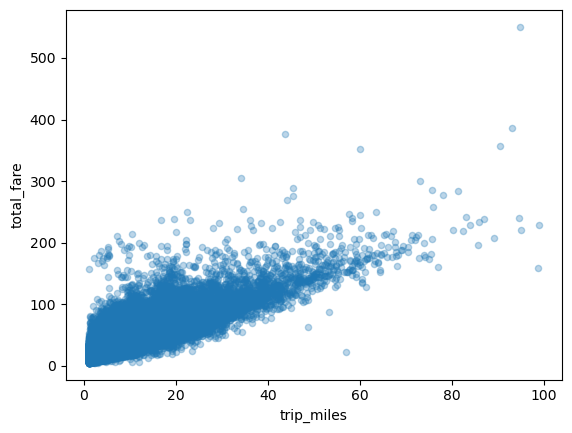

In [39]:
data.plot.scatter(x='trip_miles', y='total_fare', alpha=0.3)

<Axes: xlabel='trip_time_real', ylabel='total_fare'>

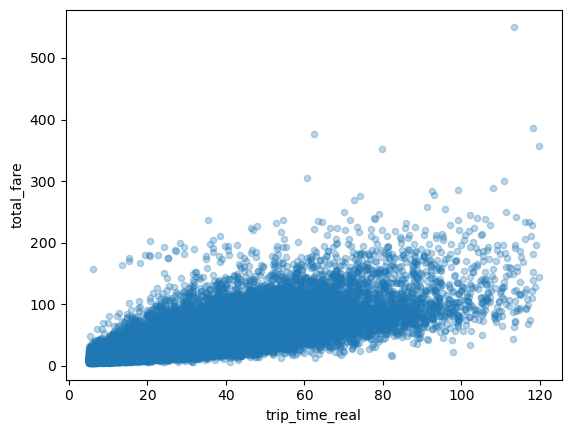

In [40]:
data.plot.scatter(x='trip_time_real', y='total_fare', alpha=0.3)

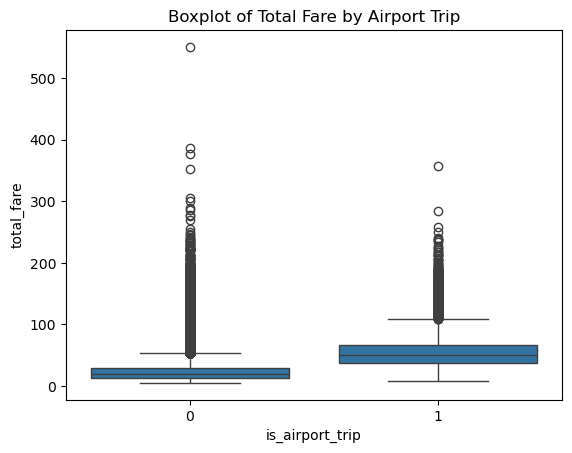

In [41]:
sns.boxplot(x='is_airport_trip', y='total_fare', data=data)
plt.title('Boxplot of Total Fare by Airport Trip')
plt.show()

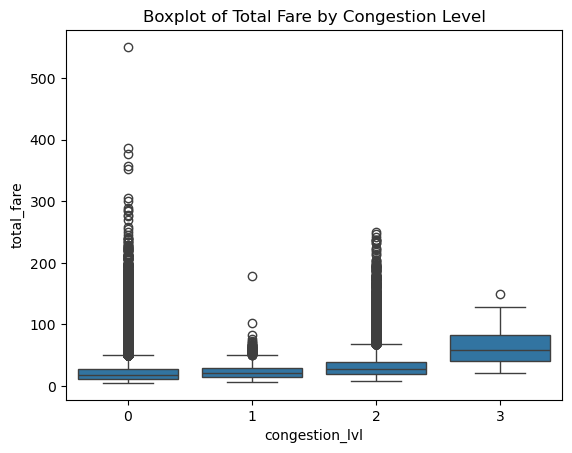

In [42]:
sns.boxplot(x='congestion_lvl', y='total_fare', data=data)
plt.title('Boxplot of Total Fare by Congestion Level')
plt.show()

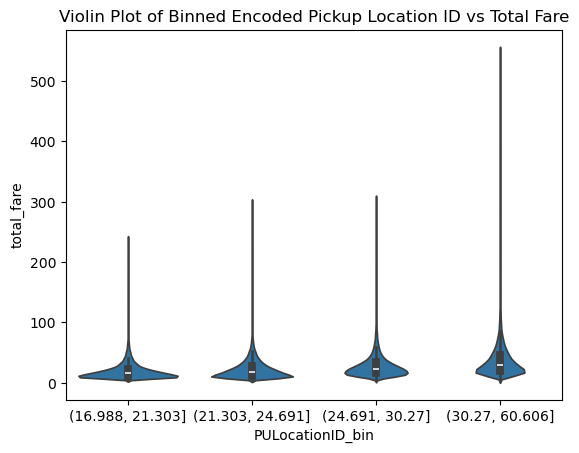

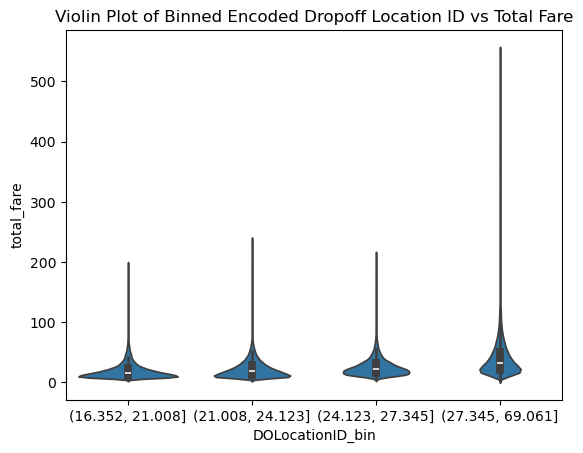

In [43]:
data['PULocationID_bin'] = pd.qcut(data['enc_PULocationID'], q=4)
data['DOLocationID_bin'] = pd.qcut(data['enc_DOLocationID'], q=4)

sns.violinplot(x='PULocationID_bin', y='total_fare', data=data)
plt.title('Violin Plot of Binned Encoded Pickup Location ID vs Total Fare')
plt.show()

sns.violinplot(x='DOLocationID_bin', y='total_fare', data=data)
plt.title('Violin Plot of Binned Encoded Dropoff Location ID vs Total Fare')
plt.show()


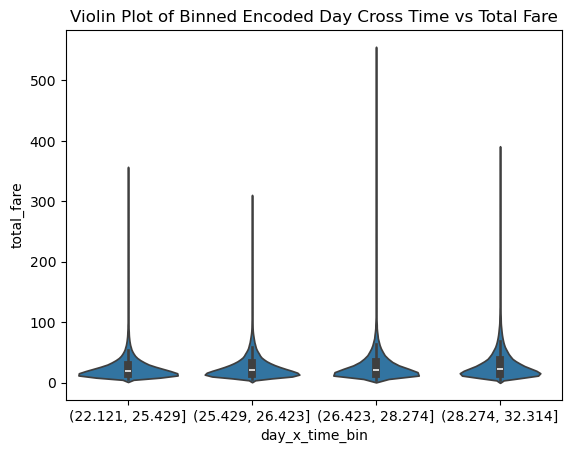

In [44]:
data['day_x_time_bin'] = pd.qcut(data['enc_day_x_time'], q=4)

sns.violinplot(x='day_x_time_bin', y='total_fare', data=data)
plt.title('Violin Plot of Binned Encoded Day Cross Time vs Total Fare')
plt.show()

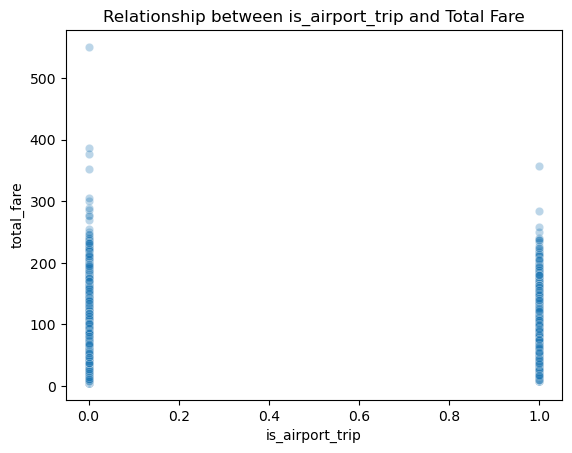

<Figure size 400x300 with 0 Axes>

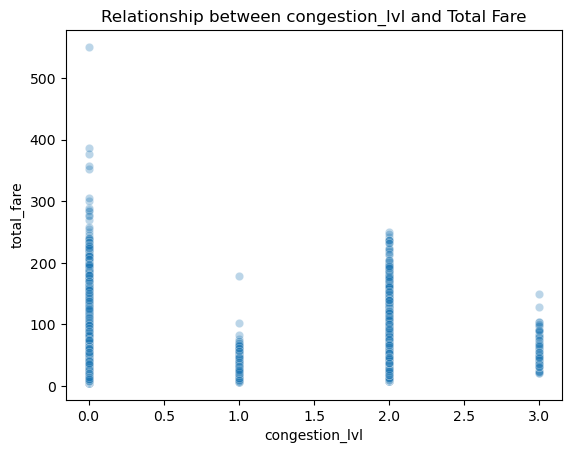

<Figure size 400x300 with 0 Axes>

In [45]:

features = ['is_airport_trip',	'congestion_lvl']
for feature in features:
    sns.scatterplot(x=data[feature], y=data['total_fare'], alpha=0.3)
    plt.title(f'Relationship between {feature} and Total Fare')
    plt.figure(figsize=(4, 3))
    plt.show()

In [46]:
data.drop(columns=['PULocationID_bin', 'DOLocationID_bin', 'day_x_time_bin'], inplace=True)

<Axes: >

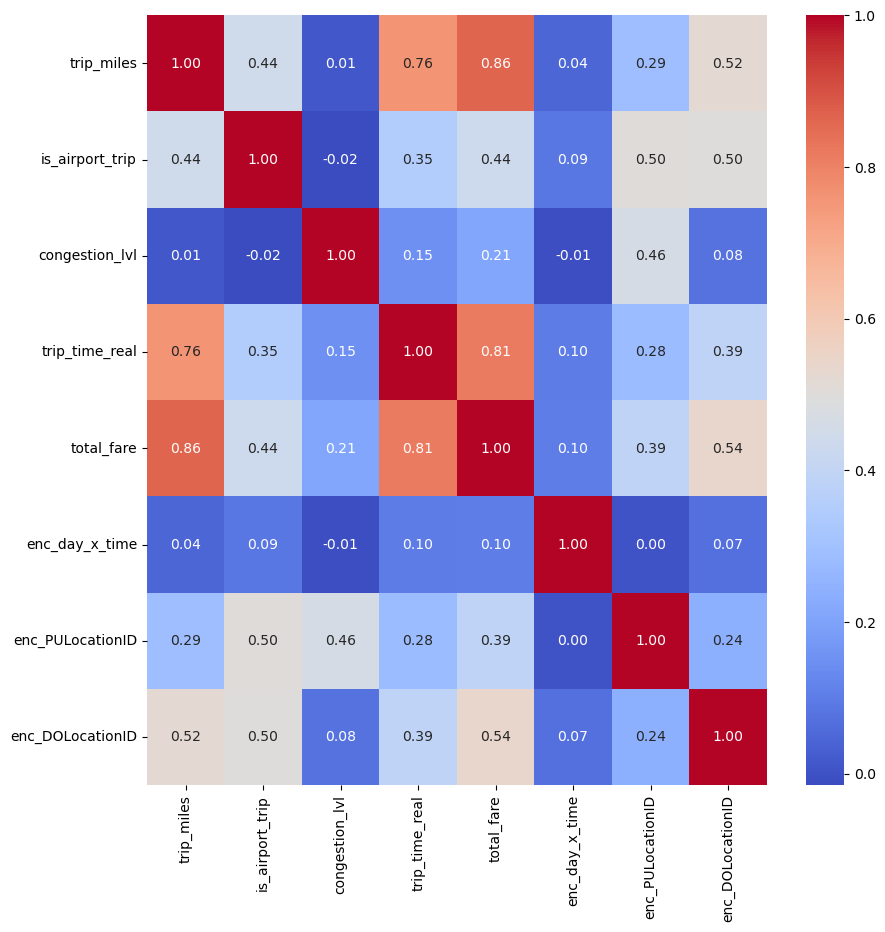

In [47]:
## generating correlation heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

## PCA

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [49]:
X = data.drop('total_fare', axis=1)  # Assuming 'total_fare' is the target
y = data['total_fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

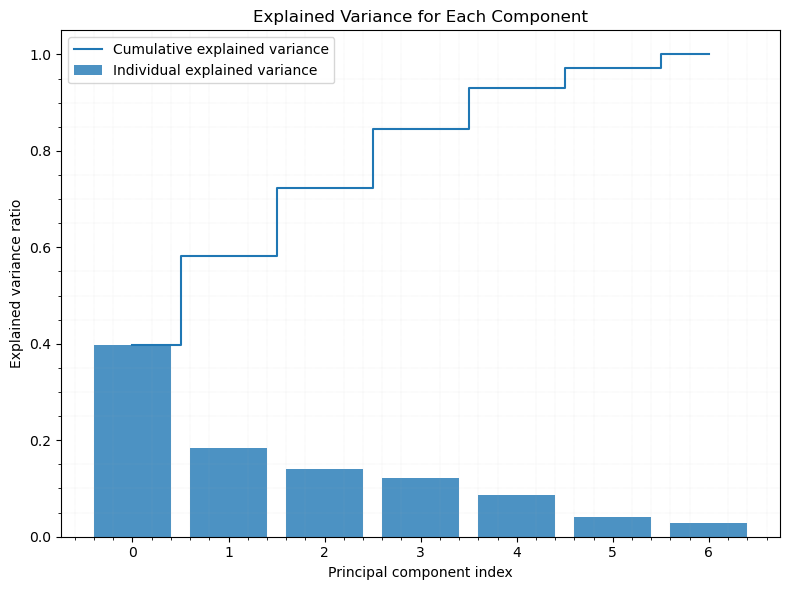

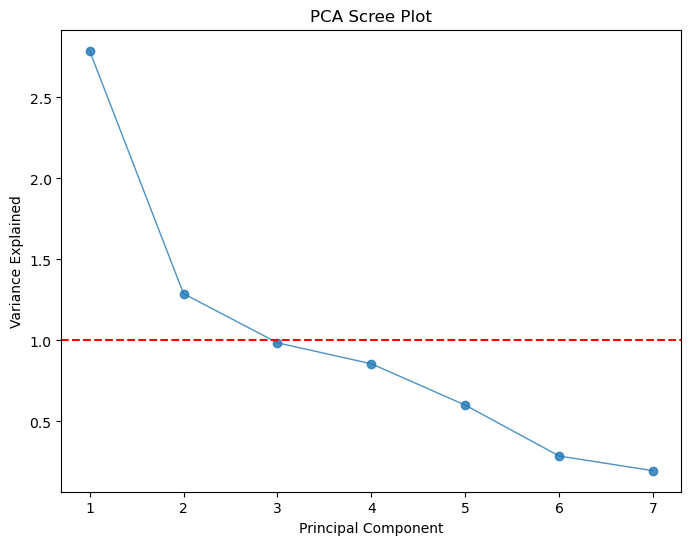

In [51]:
# Apply PCA
pca = PCA(n_components=7) 
pca.fit(X_train_scaled)
X_train_pca=pca.transform(X_train_scaled)


# Visualize explained variance for each component
exp_var_pca=pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(8,6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance for Each Component')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
## scree plot ##

plt.figure(figsize=(8,6))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'o-', linewidth=1, alpha=0.8)
plt.axhline(y=1, color='r', linestyle='--') # The Kaiser rule suggests keeping only the PCs that have eigenvalues greater than 1.
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

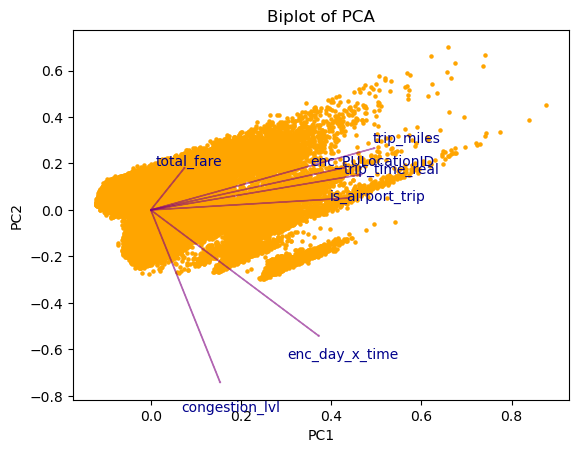

<Figure size 2000x2000 with 0 Axes>

In [52]:
def biplot(score,coef,labels=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5,
                color='orange')

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15,
                 coef[i,1] * 1.15,
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

    plt.figure(figsize=(20,20))

plt.title('Biplot of PCA')

biplot(X_train_pca,
       np.transpose(pca.components_),
       list(data.columns))

# Model Training

## Training

In [53]:
X_test_pca = pca.transform(X_test_scaled)

In [54]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Baseline Models

In [55]:
lr    = LinearRegression()
knn   = KNeighborsRegressor(n_neighbors=5)

In [56]:
# dictionary of the models that we chose for evaluation
models = {'lr': lr,
          'knn' : knn}

# getting the name and the model object from the dicitionary
for name, model in models.items():
    # training the model
    fit = model.fit(X_train_pca, y_train)
    scores = cross_val_score(fit, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
    mean_mse = -scores.mean()

    print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 65.04847370113093


Mean Squared Error (Cross-Validation): 70.3202052786073


In [57]:
for name, model in models.items():
    # training the model
    fit = model.fit(X_train_scaled, y_train)
    scores = cross_val_score(fit, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
    mean_mse = -scores.mean()

    print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 65.04847370113093
Mean Squared Error (Cross-Validation): 70.3202052786073


### More Models

In [58]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor

In [59]:
lasso = Lasso(alpha = 0.1)
en = ElasticNet(alpha = 0.1, random_state=0)
rg = Ridge(alpha=0.1)  
SGD = SGDRegressor(max_iter=1000, tol=1e-3)

In [60]:
models = {'Lasso': lasso,
          'ElasticNet' : en,
          'Ridge': rg,
          'SGDRegressor': SGD}

# getting the name and the model object from the dicitionary
for name, model in models.items():
    # training the model
    fit = model.fit(X_train_pca, y_train)
    scores = cross_val_score(fit, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
    mean_mse = -scores.mean()

    print(f" {name} MSE (Cross-Validation):", mean_mse)

 Lasso MSE (Cross-Validation): 65.184798029767


 ElasticNet MSE (Cross-Validation): 65.57949470737739
 Ridge MSE (Cross-Validation): 65.0484736813809
 SGDRegressor MSE (Cross-Validation): 65.24531479076414


In [61]:
for name, model in models.items():
    # training the model
    fit = model.fit(X_train_pca, y_train)
    scores = cross_val_score(fit, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculating the mean squared error, it was giving a negative score, so to just see the absolute error
    mean_mse = -scores.mean()

    print(f" {name} MSE (Cross-Validation):", mean_mse)

 Lasso MSE (Cross-Validation): 65.08144848091885
 ElasticNet MSE (Cross-Validation): 65.45256374745779
 Ridge MSE (Cross-Validation): 65.04847368138088
 SGDRegressor MSE (Cross-Validation): 65.17053489983027


In [62]:
from sklearn.svm import LinearSVR

In [63]:
svr = LinearSVR(epsilon=5.9, random_state=42, dual=True)
scores = cross_val_score(svr, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 66.1610276247119


In [64]:
svr = LinearSVR(epsilon=6, random_state=42, dual=True)
scores = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 66.16377282151655


In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
tree_reg = DecisionTreeRegressor(max_depth=12, random_state=42)
scores = cross_val_score(tree_reg, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 78.44435874710092


In [67]:
tree_reg = DecisionTreeRegressor(max_depth=12, random_state=42)
scores = cross_val_score(tree_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print("Mean Squared Error (Cross-Validation):", mean_mse)

Mean Squared Error (Cross-Validation): 81.67805454621518


### Hyperparameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

#### KNN

In [69]:
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)


Best parameters: {'n_neighbors': 21}
Best score: -62.204635185356075


#### Elastic Net 

In [70]:

en = ElasticNet()

param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid_search = GridSearchCV(en, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Best score: -65.10960661805998


#### Lasso

In [71]:
lasso = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'alpha': 0.001}
Best score: -65.0484861893955


#### Ridge

In [72]:
rg = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(rg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'alpha': 10}
Best score: -65.04847324263658


#### SDG

In [73]:
sdg = SGDRegressor()

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4, 1e-5]
}

grid_search = GridSearchCV(sdg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'alpha': 0.001, 'max_iter': 2000, 'penalty': 'l1', 'tol': 0.001}
Best score: -65.1046320209766


### Stacking Models

In [74]:
from sklearn.ensemble import StackingRegressor

In [75]:
en = ElasticNet(alpha=0.1, l1_ratio=0.9)
lasso = Lasso(alpha=0.001)
rg = Ridge(alpha=10)
sgd = SGDRegressor(alpha= 0.001, max_iter= 2000, penalty= 'elasticnet', tol=0.0001)

In [76]:
estimators = [
    ('en', en),
    ('lasso', lasso),
    ('rg', rg),
    ('lr', lr),
    ('sgd', sgd)
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())

### Comparing Models - Performance Evaluation

In [77]:
X_train_cv, X_val_cv, y_train_cv, y_val_cv = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=42)
stacking_regressor.fit(X_train_cv, y_train_cv)

StackingRegressor(estimators=[('en', ElasticNet(alpha=0.1, l1_ratio=0.9)),
                              ('lasso', Lasso(alpha=0.001)),
                              ('rg', Ridge(alpha=10)),
                              ('lr', LinearRegression()),
                              ('sgd',
                               SGDRegressor(alpha=0.001, max_iter=2000,
                                            penalty='elasticnet',
                                            tol=0.0001))],
                  final_estimator=Ridge())

In [78]:
models = models = {'linear': lr,
                    'knn' : knn,
                    'en': en,
                    'lasso': lasso,
                    'ridge': rg,
                    'sgd':sgd,
                    'stacking_regressor': stacking_regressor
                    }

In [79]:
import collections as co

In [80]:
results = co.defaultdict(dict)
for name, m in models.items():
    m.fit(X_train_cv, y_train_cv)
    y_pred = m.predict(X_val_cv)
    mse = mean_squared_error(y_val_cv, y_pred)
    r2  = metrics.r2_score(y_val_cv, y_pred)
    mae  = metrics.mean_absolute_error(y_val_cv, y_pred)
    results[name]['R^2'] = r2
    results[name]['MSE'] = mse
    results[name]['MAE'] = mae
df = pd.DataFrame(results).T
df['1-R^2'] = 1-df['R^2']
df

,R^2,MSE,MAE,1-R^2
linear,0.845115,62.790829,4.492574,0.154885
knn,0.830374,68.766974,4.687201,0.169626
en,0.844830,62.906396,4.459156,0.155170
lasso,0.845114,62.791569,4.492165,0.154886
ridge,0.845114,62.791291,4.492507,0.154886
sgd,0.844868,62.891109,4.455156,0.155132
stacking_regressor,0.845067,62.810569,4.498481,0.154933


## Recource Utilization Evaluation

Based on the comparison, we will not move on with knn, this section will evaluate simple Linear Regression, ElasticNet, Lasso, Ridge, SDG and stacking regressors

### Time Evaluation

#### Overall Time

In [81]:
%%timeit -r1
lr = LinearRegression()
fit = lr.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

20.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [82]:
%%timeit -r1
en = ElasticNet(alpha=0.1, l1_ratio=0.9)
fit = en.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

44.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [83]:
%%timeit -r1
lasso = Lasso(alpha=0.001)
fit = lasso.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

84.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [84]:
%%timeit -r1
rg = Ridge(alpha=10)
fit = rg.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

12.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [85]:
%%timeit -r1
sgd = SGDRegressor(alpha= 0.001, max_iter= 2000, penalty= 'elasticnet', tol=0.0001)
fit = sgd.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

169 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [86]:
%%timeit -r1
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())
fit = stacking_regressor.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

1.44 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Fitting Time

In [87]:
%timeit -r1 lr_fit = lr.fit(X_train_cv, y_train_cv)

%timeit -r1 en_fit = en.fit(X_train_cv, y_train_cv)

%timeit -r1 lasso_fit = lasso.fit(X_train_cv, y_train_cv)

%timeit -r1 rg_fit = rg.fit(X_train_cv, y_train_cv)

%timeit -r1 sgd_fit = sgd.fit(X_train_cv, y_train_cv)

%timeit -r1 stacking_fit = stacking_regressor.fit(X_train_cv, y_train_cv)

11.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
21.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
28.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4.92 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
115 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
1.64 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Time Prediction

In [88]:
lr_fit = lr.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = lr_fit.predict(X_val_cv)

en_fit = en.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = en_fit.predict(X_val_cv)

lasso_fit = lasso.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = lasso_fit.predict(X_val_cv)

rg_fit = rg.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = rg_fit.predict(X_val_cv)

sgd_fit = sgd.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = sgd_fit.predict(X_val_cv)

stacking_fit = stacking_regressor.fit(X_train_cv, y_train_cv)
%timeit -r1 preds = stacking_fit.predict(X_val_cv)

263 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
225 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
1.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
264 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
185 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
1.66 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)


### Memory Usage

#### Overall Usage

In [89]:
%load_ext memory_profiler

In [90]:
%%memit -r1
lr = LinearRegression()
fit = lr.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 507.59 MiB, increment: 1.14 MiB


In [91]:
%%memit -r1
en = ElasticNet(alpha=0.1, l1_ratio=0.9)
fit = en.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 512.19 MiB, increment: 4.59 MiB


In [92]:
%%memit -r1
lasso = Lasso(alpha=0.001)
fit = lasso.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 512.22 MiB, increment: 0.00 MiB


In [93]:
%%memit -r1
rg = Ridge(alpha=10)
fit = rg.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 507.56 MiB, increment: 0.00 MiB


In [94]:
%%memit -r1
sgd = SGDRegressor(alpha= 0.001, max_iter= 2000, penalty= 'elasticnet', tol=0.0001)
fit = sgd.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 503.06 MiB, increment: 0.00 MiB


In [95]:
%%memit -r1
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())
fit = stacking_regressor.fit(X_train_cv, y_train_cv)
preds = fit.predict(X_val_cv)
metrics.mean_squared_error(y_val_cv, preds)

peak memory: 497.17 MiB, increment: 20.12 MiB


#### Fitting Memory Usage

In [96]:
%memit -r1 lr_fit = lr.fit(X_train_cv, y_train_cv)
%memit -r1 en_fit = en.fit(X_train_cv, y_train_cv)
%memit -r1 lasso_fit = lasso.fit(X_train_cv, y_train_cv)
%memit -r1 rg_fit = rg.fit(X_train_cv, y_train_cv)
%memit -r1 sgd_fit = sgd.fit(X_train_cv, y_train_cv)
%memit -r1 stacking_fit = stacking_regressor.fit(X_train_cv, y_train_cv)

peak memory: 497.17 MiB, increment: 0.00 MiB
peak memory: 497.06 MiB, increment: 0.00 MiB
peak memory: 497.06 MiB, increment: 0.00 MiB
peak memory: 497.17 MiB, increment: 0.11 MiB
peak memory: 497.17 MiB, increment: 0.00 MiB
peak memory: 510.81 MiB, increment: 14.45 MiB


In [97]:
lr_fit = lr.fit(X_train_cv, y_train_cv)
%memit -r1 preds = lr_fit.predict(X_val_cv)

en_fit = en.fit(X_train_cv, y_train_cv)
%memit -r1 preds = en_fit.predict(X_val_cv)

lasso_fit = lasso.fit(X_train_cv, y_train_cv)
%memit -r1 preds = lasso_fit.predict(X_val_cv)

rg_fit = rg.fit(X_train_cv, y_train_cv)
%memit -r1 preds = rg_fit.predict(X_val_cv)

sgd_fit = sgd.fit(X_train_cv, y_train_cv)
%memit -r1 preds = sgd_fit.predict(X_val_cv)

stacking_fit = stacking_regressor.fit(X_train_cv, y_train_cv)
%memit -r1 preds = stacking_fit.predict(X_val_cv)

peak memory: 510.81 MiB, increment: 0.00 MiB
peak memory: 510.81 MiB, increment: 0.00 MiB
peak memory: 510.81 MiB, increment: 0.00 MiB
peak memory: 510.81 MiB, increment: 0.00 MiB
peak memory: 510.81 MiB, increment: 0.00 MiB
peak memory: 514.59 MiB, increment: 0.00 MiB


# Final Model

Based on the performance and resource utilization, we choose to use Ridge Regressor

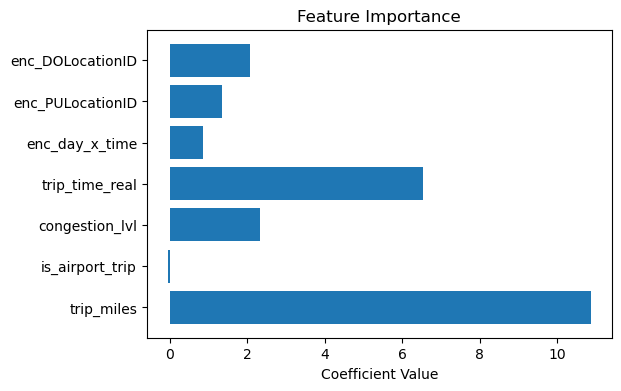

In [98]:
features = X.columns.tolist()
coefficients = rg.coef_

# Plotting feature importance
plt.figure(figsize=(6, 4))
plt.barh(range(len(features)), coefficients, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [107]:
ridge = Ridge()

param_distribs = {'alpha': randint(low=1, high=15),
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'fit_intercept': [True] }

rnd_search = RandomizedSearchCV(
    ridge, param_distributions=param_distribs, n_iter=100, cv=3,
    scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_train_scaled, y_train)

print("Best parameters:", rnd_search.best_params_)

# Best score achieved
print("Best score:", rnd_search.best_score_)

Best parameters: {'alpha': 12, 'fit_intercept': True, 'solver': 'saga'}
Best score: -65.04961653891603


In [126]:
final_predictions = rg.predict(X_test_scaled)

final_mae = metrics.mean_absolute_error(y_test, final_predictions)
print(final_mae)  

4.5027532518961095


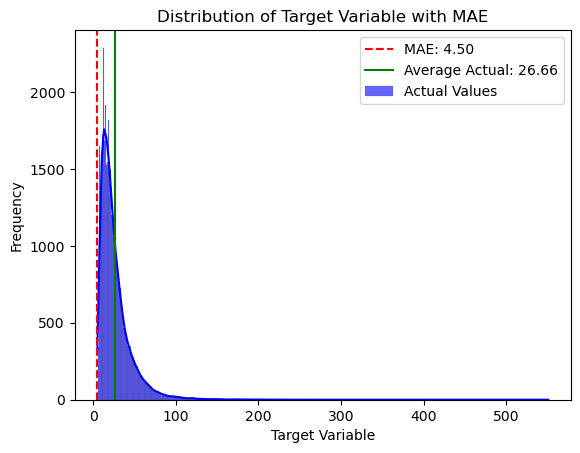

In [130]:
avg = y_test.mean()
sns.histplot(y_test, kde=True, label='Actual Values', color='blue', alpha=0.6)
plt.axvline(x=final_mae, color='red', linestyle='--', label=f'MAE: {final_mae:.2f}')
plt.axvline(x=avg, color='green', linestyle='-', label=f'Average Actual: {avg:.2f}')

plt.title('Distribution of Target Variable with MAE')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [133]:
mae_percent = final_mae / avg * 100
print(f"MAE% {mae_percent:.2f}%")

MAE% 16.89%


# Pipeline

In [114]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [115]:
# Step 1: feature filter
features_to_keep = ['base_passenger_fare', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles', 'airport_fee', 'congestion_surcharge']

feature_selector = ColumnTransformer([
    ('selector', 'passthrough', features_to_keep)
], remainder='drop') 

In [116]:
# Step 2: total fare
def calculate_total_fare(X):
    X = X.copy()  # Avoid changes to the original DataFrame
    X['total_fare'] = X['base_passenger_fare'] + X['airport_fee'] + X['congestion_surcharge']
    return X

total_fare_transformer = FunctionTransformer(calculate_total_fare)


In [118]:

# Example pipeline with FunctionTransformer
pipeline = Pipeline(steps=[
    ('feature_selector', feature_selector),
    ('add_total_fare', total_fare_transformer),
])

In [119]:
data2=pd.read_parquet('./fhvhv_tripdata_2022-11.parquet')
data2 = data2.sample(n=200000, random_state=1)

## Extra

In [101]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_rmses = -cross_val_score(forest_reg, X_train_scaled, y_train,
                                scoring="neg_root_mean_squared_error", cv=5)

In [102]:
forest_rmses

array([7.8461541 , 7.95595613, 8.21786887, 7.91300998, 8.14696129])

In [104]:
forest_reg.fit(X_train_cv, y_train_cv)
y_pred = forest_reg.predict(X_val_cv)
mse = mean_squared_error(y_val_cv, y_pred)
r2  = metrics.r2_score(y_val_cv, y_pred)
mae  = metrics.mean_absolute_error(y_val_cv, y_pred)

print(mse)
print(mae)

60.68215545135586
4.4064867932967555
